In [4]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# <center>Небольшой мануал по основным графикам в seaborn</center>

Далее будем использовать встроенный набор данных о чаевых.

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

В библиотеках Matplotlib и Seaborn для визуализации данных существует много различных функций построения графиков. Однако такие функции разумно применять не на любых признаках. Мы с вами уже изучали, что признаки (или переменные) могут быть количественными и категориальными. Очень хорошо, если вы умеете их отличать. В зависимости от типов признаков существуют свои функции построения графиков. Рассмотрим наиболее часто используемые из них на конкретных данных. 

# 1. Признаки по одному

## 1.1 Количественные

Количественные признаки можно отображать следующими полезными функциями:
* `histplot`
* `kdeplot`
* `boxplot`

### `histplot` и `kdeplot`

`histplot` с параметром `kde=True` показывает гистограмму и график плотности распределения

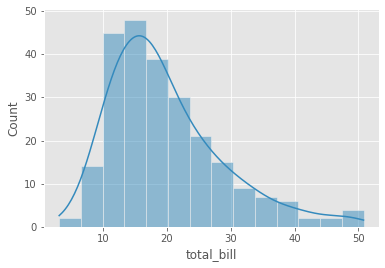

In [5]:
sns.histplot(tips['total_bill'], kde = True);

Можем посмотреть только на плотность, используя функцию `kdeplot` 

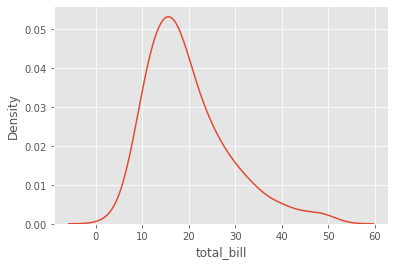

In [6]:
sns.kdeplot(tips['total_bill']);

### `boxplot`

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/boxplot.png?raw=true" height="400" width="700">
</center>

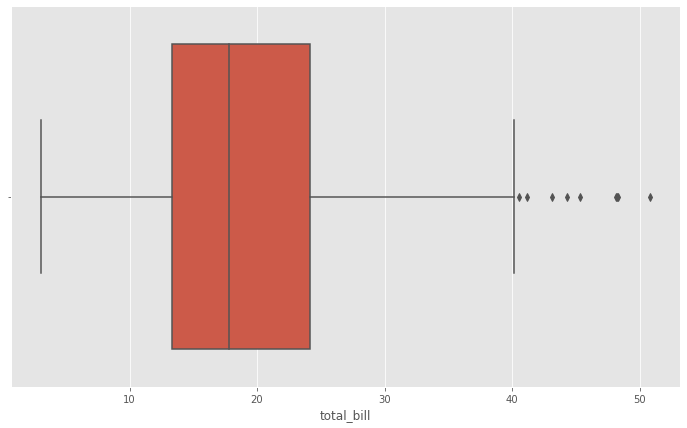

In [7]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(tips['total_bill']); 

## 1.2 Категориальные

### `countplot`

Считаем количество значений в каждой категории.

In [8]:
tips.shape

(244, 7)

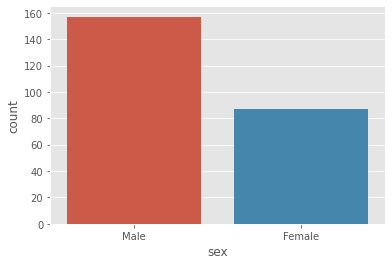

In [8]:
sns.countplot(x = 'sex', data = tips);

# 2. Взаимодействие признаков

## 2.1 Количественный с количественным

### `kdeplot`

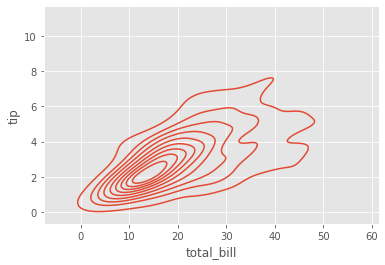

In [9]:
sns.kdeplot(tips['total_bill'], tips['tip']);

### `jointplot`

`jointplot` показывает совместное распределение по двум переменным. Она имеет параметр `kind`, который может принимать следующие значения:
* `scatter`
* `reg`
* `resid`
* `kde`
* `hex`

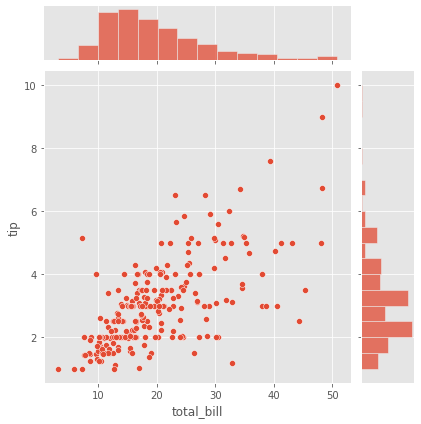

In [11]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'scatter');

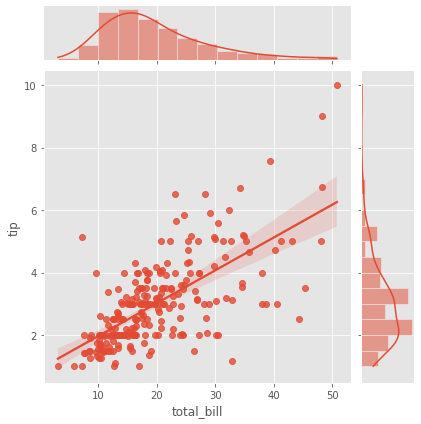

In [12]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg');

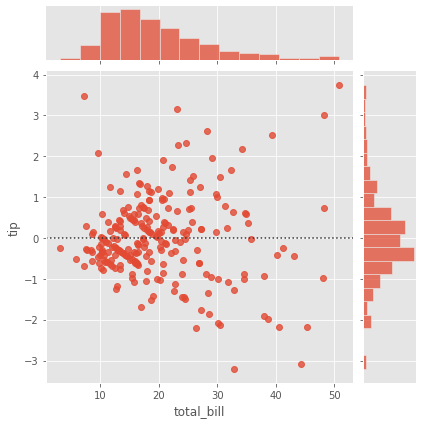

In [13]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'resid');

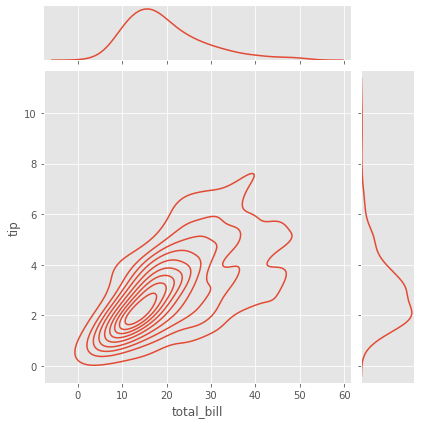

In [14]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'kde');

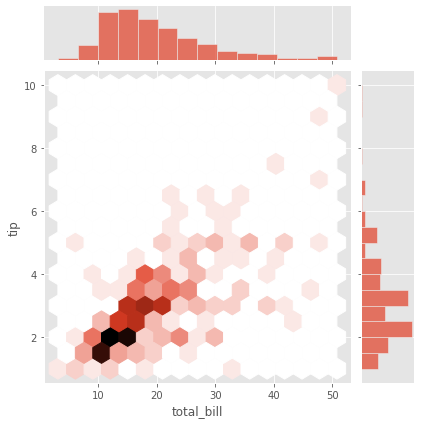

In [15]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'hex');

## 2.2 Количественный с категориальным

### `barplot`

`barplot` аггрегирует данные по значениям категориальной переменной и применяет определенную функцию к значениям соответствующих групп количественной переменной. По умолчанию это функция **среднее**, однако эту функцию можно изменить в параметре `estimator`

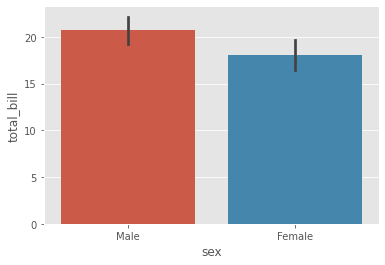

In [10]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips);

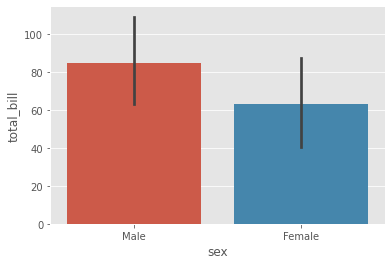

In [11]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.var);

### `boxplot`

И снова уже рассматриваемая нами функция `boxplot`. При взаимодействии признаков эта функция может быть в разы полезнее, так как все нагляднее в сравнении!

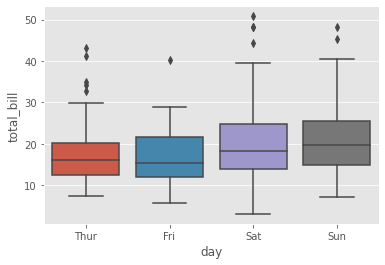

In [12]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips);

Для удобства можно перевернуть

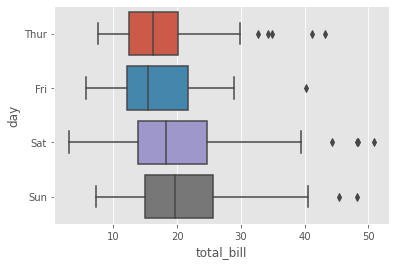

In [13]:
sns.boxplot(x = 'total_bill', y = 'day', data = tips, orient = 'h');

А можно так вообще открыть третье измерение

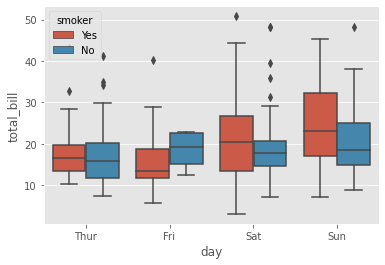

In [14]:
sns.boxplot(x = 'day', y = 'total_bill', hue = 'smoker', data = tips);

### `violinplot`

Выполняет ту же функцию, что и `boxplot`. По сути это два повернутые на 90 и -90 градусов графика плотности распределения, слипшиеся друг с другом, в результате чего получается что-то похожее на виолончель, откуда и название.

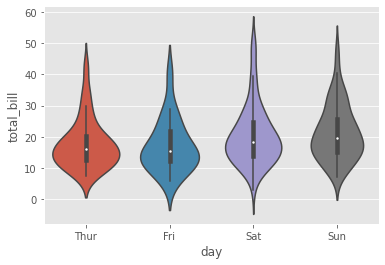

In [21]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips);

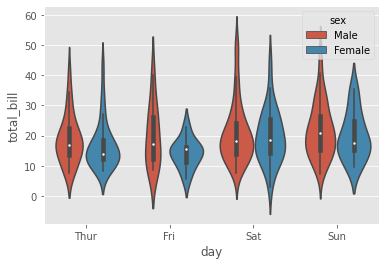

In [3]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex');

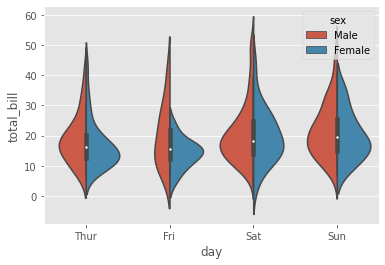

In [4]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True);

### `stripplot` и `swarmplot`

`stripplot` рисует диаграмму рассеивания, состоящую из одной категориальной переменной. 

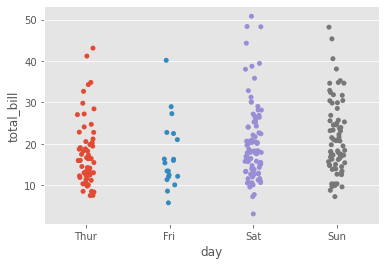

In [5]:
sns.stripplot(data = tips, x = 'day', y = 'total_bill');

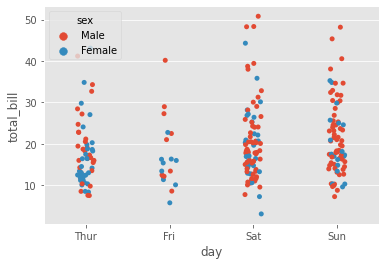

In [6]:
sns.stripplot(data = tips, x = 'day', y = 'total_bill',jitter = True, hue = 'sex');

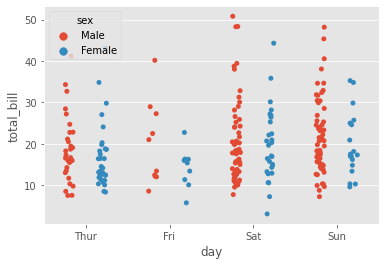

In [7]:
sns.stripplot(data = tips, x = 'day', y = 'total_bill', jitter = True, hue = 'sex', dodge = True);

`swarmplot` показывает ровно то же самое, только точки не накладываются друг на друга

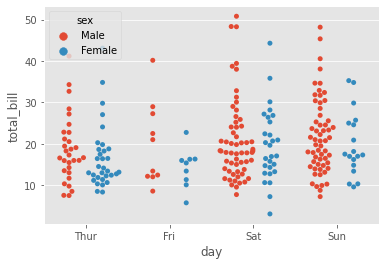

In [8]:
sns.swarmplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', dodge = True);

Иногда бывает полезно комбинировать эти графики с `violinplot`

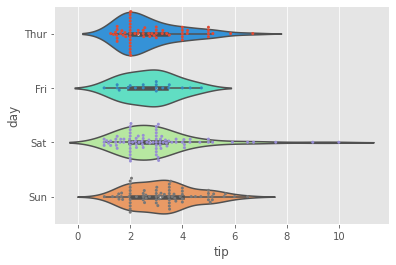

In [28]:
sns.violinplot(data = tips, x = 'tip', y = 'day', palette = 'rainbow')
sns.swarmplot(data = tips, x = 'tip', y = 'day', size = 3);

## 2.3 Комбинации всех признаков в выборке

### `pairplot`

`pairplot` показывает отношение между всеми парами переменных. На диагонали находятся гистограммы, а на других местах - диаграммы рассеивания

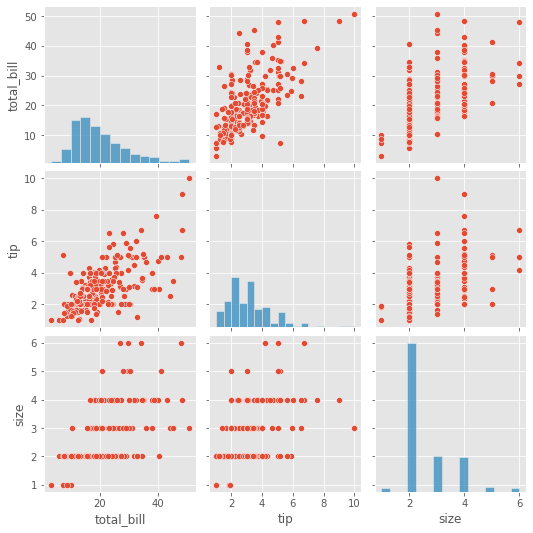

In [9]:
sns.pairplot(tips);

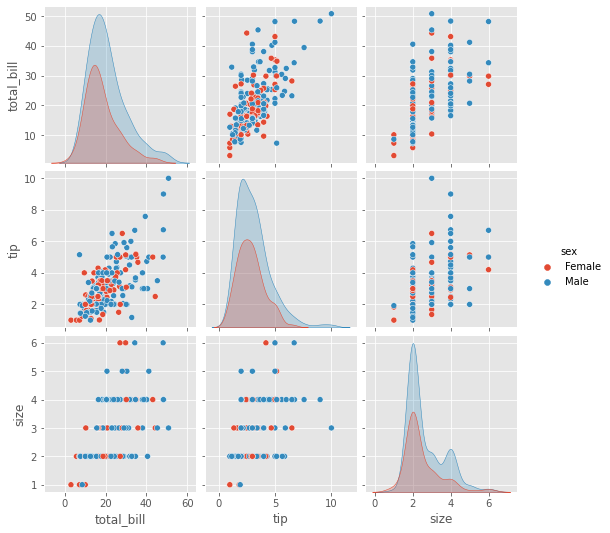

In [10]:
sns.pairplot(tips, hue = 'sex', hue_order = ['Female', 'Male']);

### `PairGrid`

`PairGrid` это более расширенная функция, позволяющая показывать отношения между всеми парами параметров по различным функциям. По сути `pairplot` является ее частным случаем. 

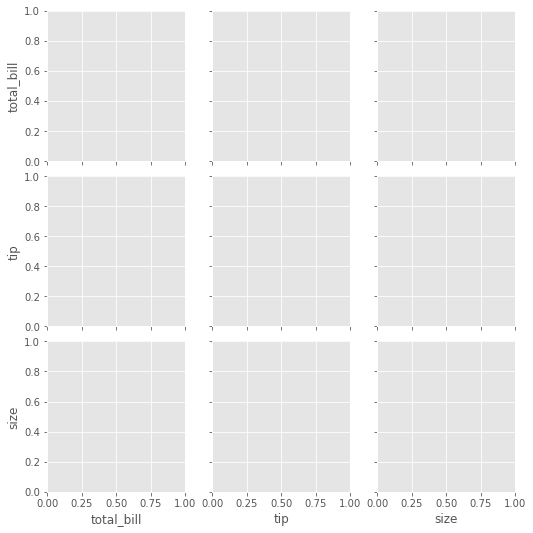

In [11]:
sns.PairGrid(tips);

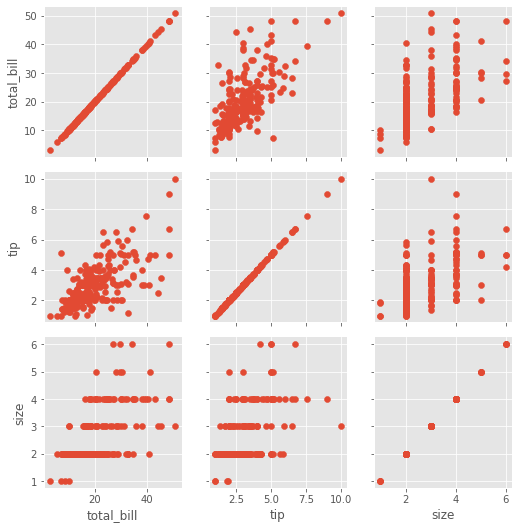

In [32]:
g = sns.PairGrid(tips)
g.map(plt.scatter);

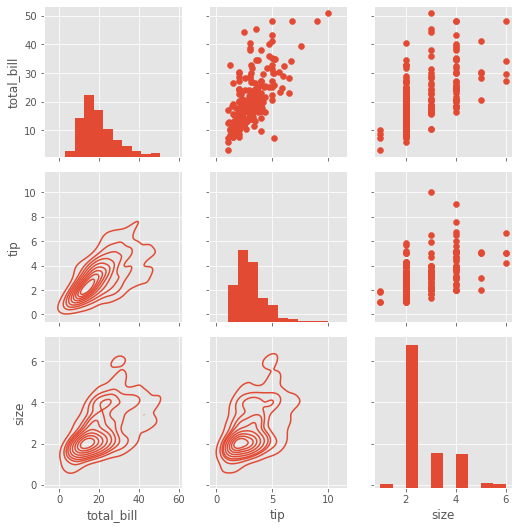

In [6]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

## 2.4 Количественный и несколько категориальных 

### `FacetGrid`
`FacetGrid` позволяет визуализировать совместное распределение отдельных признаков нескольких переменных

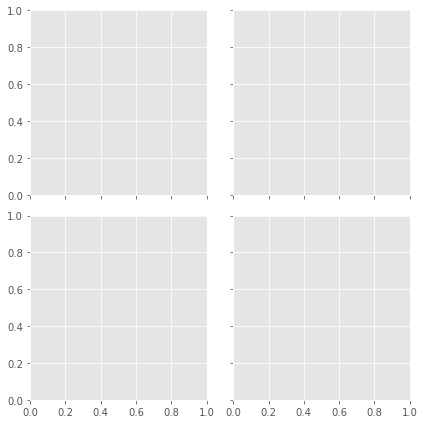

In [12]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker');

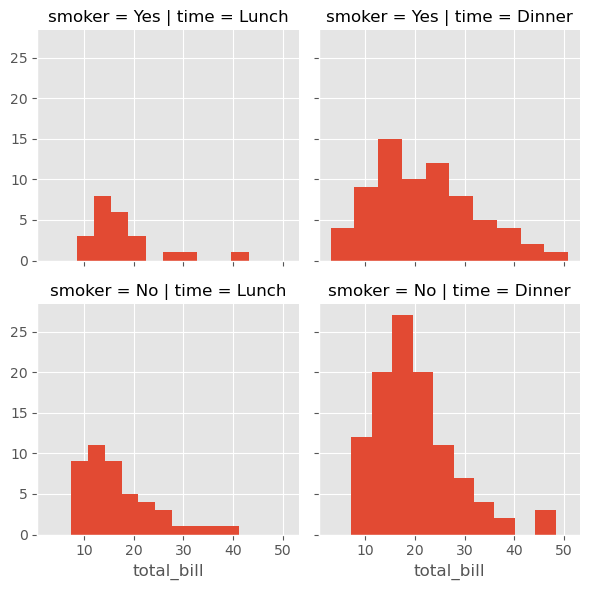

In [46]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker');
g = g.map(plt.hist, 'total_bill');

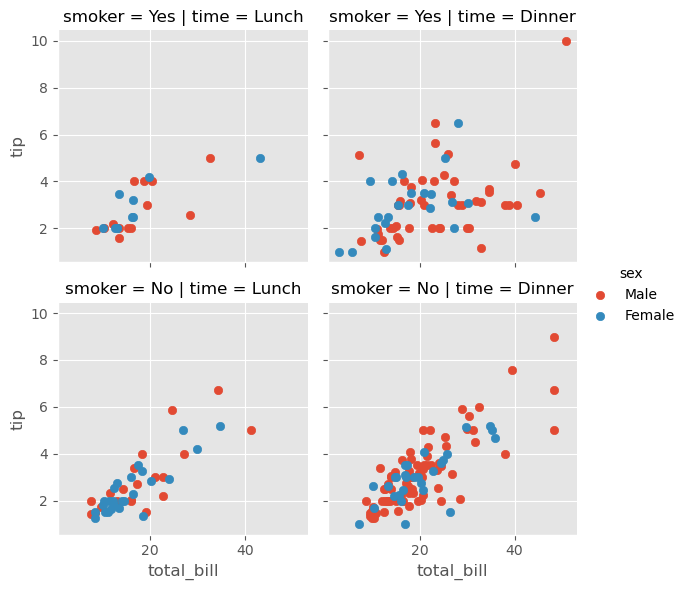

In [47]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker', hue = 'sex');
g = g.map(plt.scatter, 'total_bill', 'tip').add_legend();

# 3. Матричные графики

In [13]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


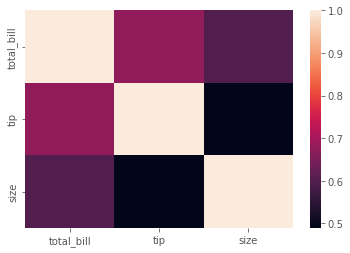

In [14]:
sns.heatmap(tips.corr());

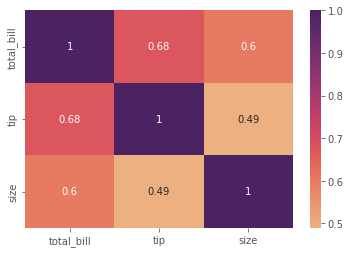

In [15]:
sns.heatmap(tips.corr(), annot = True, cmap='flare');

In [16]:
flights = sns.load_dataset('flights')

In [17]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Посчитаем таблицу сопряженности, которая покажет, какое кол-во пассажиров летало в различные месяцы в каждый из годов в промежутке от 1949 по 1960.

In [52]:
pvflights = flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')
pvflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


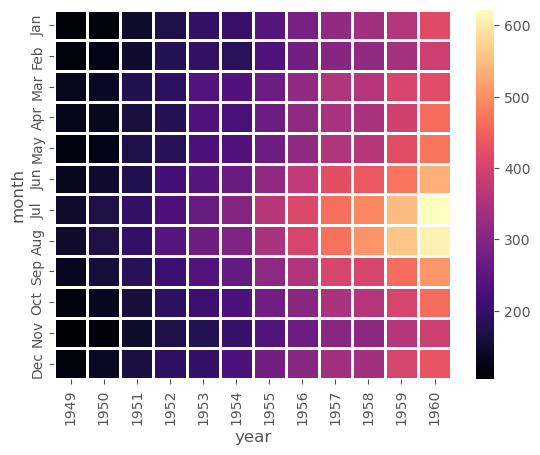

In [53]:
sns.heatmap(pvflights, linecolor = 'white', linewidths = 1, cmap = 'magma');